# Imports

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
from pathlib import Path

drive.mount(r"/content/drive/")
WORKING_DIRECTORY = Path(r"/content/drive/MyDrive/postcards")

Mounted at /content/drive/


In [ ]:
import random
import os


def seed_everything(seed):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)

# EDA

## Read the data

In [ ]:
df = pd.read_csv(WORKING_DIRECTORY / 'corpus.csv')
df

,Номер открытки,Лицевая сторона - ссылка,Оборотная сторона - ссылка,Язык текста открытки,Текст открытки,Перевод текста открытки (если на иностранном языке),Вид орфографии,"Дата написания текста (если автор указал явно, не штемпели)",Адрес отправителя,Имя отправителя,...,Населенный пункт (откуда),Страна (куда),Населенный пункт (куда),Тег_1,Тег_2,Тег_3,Тег_4,Тег_5,Тег_6,Тег_7
0,50,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,"{Милый Жоржик! Простите, голубчик, за молчание...",NaN,Дореволюционная,[отсутствует],г. Одесса,[отсутствует],...,"Херсонская губерния,Одесский уезд, г. Одесса",Российская Империя,"Тифлисская губерния, Тифлисский уезд, г. Тифлис",Шлю привет,Житейское,Дурные вести,Учеба,"Простите, что долго не писал",NaN,NaN
1,51,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,Добрейший Паша! Будь добр вышли мне на консерв...,NaN,Дореволюционная,xx.xx.xxxx,Москва,М.Каневски,...,"Московская губерния, Московский уезд, город Мо...",Российская Империя,"Область Войска Донского, Ростовский уезд, горо...",Просьба,Рассказ об искусстве,Шлю привет,NaN,NaN,NaN,NaN
2,52,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,Милая моя Олечка! Открытку твою получила. Спас...,NaN,Дореволюционная,07.12.1910,Одесса,[отсутствует],...,"Херсонская губерния, Одесский уезд, город Одесса",Российская Империя,"Тифлисская губерния, Тифлисский уезд, город Ти...",Новости,Житейское,Дурные вести,Письма от семьи,Письма от мамы,Шлю привет,NaN
3,67,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,немецкий,Odessa. 30. 7. 01. Herzliche Grüße von [?M.Cho...,Сердечный привет от [?М. Холоденко],Латиница/дореволюционная,30.07.1901,Одесса,[?M.Cholodenko] [Перевод] [?М. Холоденко],...,город Одесса,Германия,"Саксония, город Дрезден",Шлю привет,Иностранный язык,NaN,NaN,NaN,NaN,NaN
4,68,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,иностранный язык,[отсутствует],NaN,Латиница,[отсутствует],[отсутствует],[отсутствует],...,[отсутствует],[отсутствует],[отсутствует],NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32637,252875,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,Дорогой Вано! Поздравляем вас все[^всех] с Вел...,NaN,Современная,04.11.xxxx,[отсутствует],С. Чижов,...,"РСФСР, г.Москва",СССР,[отсутствует],Октябрьская революция,Поздравление в тексте,Поздравление на картинке,Житейское,NaN,NaN,NaN
32638,252876,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,Люда! поздравляем вас всех с праздником Октябр...,NaN,Современная,01.11.1965,[отсутствует],Женя,...,"РСФСР, Пензенская область, г. Пенза",СССР,"РСФСР, Пензенская область, г. Нижний Ломов",Октябрьская революция,Поздравление в тексте,Поздравление на картинке,Шлю привет,Житейское,NaN,NaN
32639,252879,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,Уважаемые Дмитрий Иванович и Мария Федоровна! ...,NaN,Современная,[отсутствует],[отсутствует],"Нелля, Володя",...,[отсутствует],[отсутствует],[отсутствует],Новый год,Поздравление в тексте,Поздравление на картинке,NaN,NaN,NaN,NaN
32640,252882,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,"Здавствуйте Нина, Ваня! Как ваше здоровье? мы ...",NaN,Современная,[отсутствует],[отсутствует],Зоя,...,[отсутствует],[отсутствует],[отсутствует],Житейское,Дети на картинке,NaN,NaN,NaN,NaN,NaN


In [ ]:
sample = dict(df.iloc[0])
sample

{'Номер открытки': 50,
 'Лицевая сторона - ссылка': 'https://storage.yandexcloud.net/postcards-resize-880pix/50-1-resize.jpg',
 'Оборотная сторона - ссылка': 'https://storage.yandexcloud.net/postcards-resize-880pix/50-2-resize.jpg',
 'Язык текста открытки': 'русский',
 'Текст открытки': '{Милый Жоржик! Простите, голубчик, за молчание. Все собиралась ответить причина, конечно, не из уважительных, но я зная Ваш милый, добрый характер!!! надеюсь получить от Вас прощенье даже и на будущее замедленье. Что же Вы поделываете скучаете вообще? А по нас в частности? Да? Ну как уроки? Получили много? У меня весь день занятия до вечера и все очень хорошие уроки. Писала [нрзб] девочки-подростки? А еще новость: бедный прапорщик запаса заболел плевритом, довольно серьезно. Жалко его очень и у меня даже времени нет поухаживать за ним как следует. Поклон ваш я ему передала, он просил передать ответный. Ну а за сим, прощайте, привет сердечный Вашим. <подпись>}',
 'Перевод текста открытки (если на иностр

In [ ]:
df.shape[0]

32642

## Languages

In [ ]:
df['Язык текста открытки'].value_counts()

,count
Язык текста открытки,
русский,32381
украинский,82
английский,54
французский,33
немецкий,23
польский,22
[отсутствует],10
белорусский,9
болгарский,8


In [ ]:
df = df[df['Язык текста открытки'] == 'русский']

In [ ]:
df['Текст открытки'] = df['Текст открытки'].map(lambda x: x.replace('[отсутствует]', ''))
df['Текст открытки'] = df['Текст открытки'].map(lambda x: x.replace('[нрзб]', ''))

<ipython-input-10-33bad421bfd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Текст открытки'] = df['Текст открытки'].map(lambda x: x.replace('[отсутствует]', ''))
<ipython-input-10-33bad421bfd2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Текст открытки'] = df['Текст открытки'].map(lambda x: x.replace('[нрзб]', ''))


In [ ]:
df = df[df['Текст открытки'].map(len) > 30]

In [ ]:
df.shape

(31755, 34)

## Year

In [ ]:
df['год'] = df['Дата открытки (нормализованная)'].map(lambda x: x.split('.')[-1] if isinstance(x, str) else x)
df['год'].isna().sum()

4701

In [ ]:
df = df[df['год'].notna()]
df['год'] = df['год'].astype(int)

<ipython-input-14-9802074c8609>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['год'] = df['год'].astype(int)


In [ ]:
year_counts = pd.DataFrame(df['год'].value_counts()).reset_index()
year_counts[year_counts['год'] <= 1900].sort_values('год')

,год,count
132,1625,1
130,1783,1
131,1819,1
133,1881,1
129,1884,1
122,1891,5
123,1892,3
127,1895,2
119,1898,8
105,1899,24


In [ ]:
year_counts[(year_counts['год'] > 1900) & (year_counts['год'] <= 1920)].sort_values('год')

,год,count
61,1901,87
56,1902,110
48,1903,196
44,1904,287
34,1905,347
35,1906,336
9,1907,528
8,1908,612
7,1909,745
5,1910,946


<Axes: xlabel='год', ylabel='Count'>

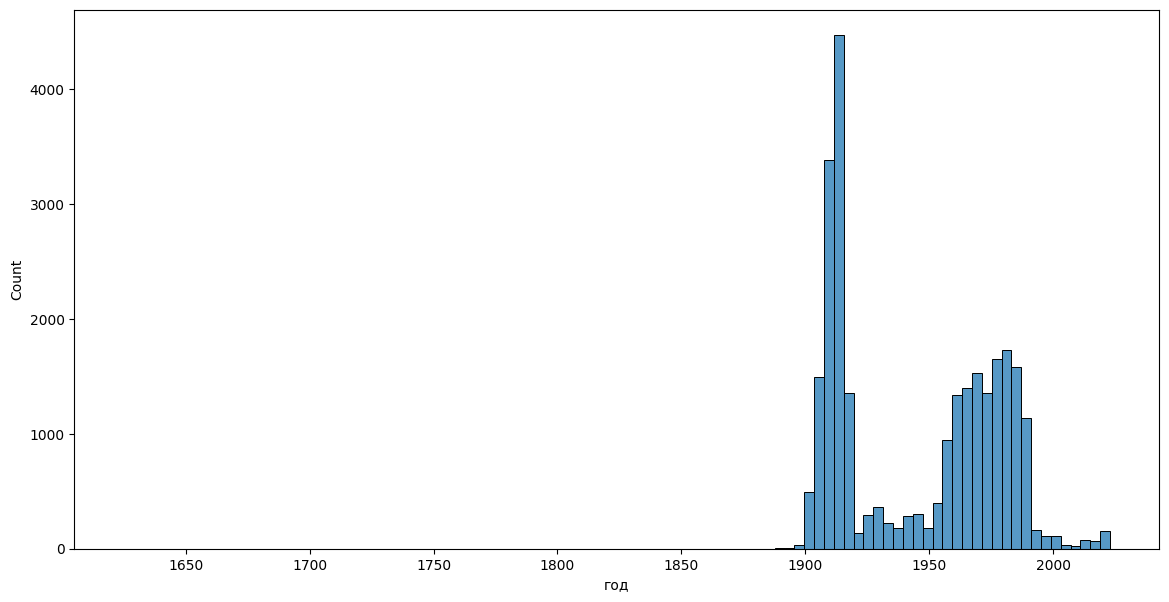

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))

sns.histplot(df['год'], bins=100)

<Axes: xlabel='год', ylabel='Count'>

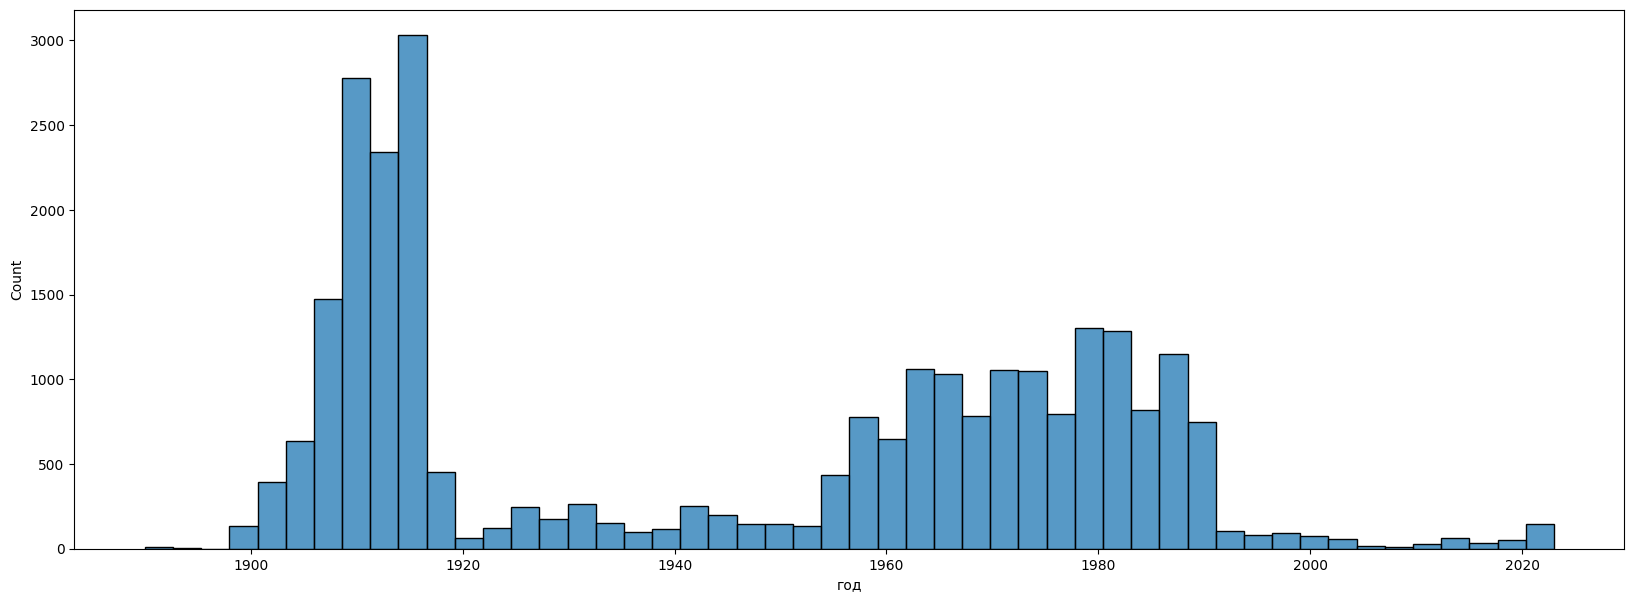

In [ ]:
plt.figure(figsize=(20, 7))


sns.histplot(df['год'], binrange=[1890, 2023], bins=50)

# Clustering

## LDA

### Text preprocessing

In [ ]:
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 961.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 31.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy


spacy_model = spacy.load("ru_core_news_sm")


def preprocess(doc):
    clean_text = []
    for token in spacy_model(doc):
        lemma =  token.lemma_.lower()
        if token.pos_  == 'PROPN' and token.ent_type_ == 'LOC' and lemma not in spacy_model.Defaults.stop_words:
                clean_text.append(lemma)
        elif token.pos_  in ['VERB', 'ADV', 'ADJ', 'NOUN'] and lemma not in spacy_model.Defaults.stop_words:
                clean_text.append(lemma)

    return clean_text

In [ ]:
df['Текст обработанный'] = df['Текст открытки'].map(preprocess)
df

,Номер открытки,Лицевая сторона - ссылка,Оборотная сторона - ссылка,Язык текста открытки,Текст открытки,Перевод текста открытки (если на иностранном языке),Вид орфографии,"Дата написания текста (если автор указал явно, не штемпели)",Адрес отправителя,Имя отправителя,...,Населенный пункт (куда),Тег_1,Тег_2,Тег_3,Тег_4,Тег_5,Тег_6,Тег_7,год,Текст обработанный
0,50,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,"{Милый Жоржик! Простите, голубчик, за молчание...",NaN,Дореволюционная,[отсутствует],г. Одесса,[отсутствует],...,"Тифлисская губерния, Тифлисский уезд, г. Тифлис",Шлю привет,Житейское,Дурные вести,Учеба,"Простите, что долго не писал",NaN,NaN,1906,"[милый, простить, голубчик, молчание, собирать..."
1,51,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,Добрейший Паша! Будь добр вышли мне на консерв...,NaN,Дореволюционная,xx.xx.xxxx,Москва,М.Каневски,...,"Область Войска Донского, Ростовский уезд, горо...",Просьба,Рассказ об искусстве,Шлю привет,NaN,NaN,NaN,NaN,1910,"[добрейший, выйти, консерватория, москва, прог..."
2,52,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,Милая моя Олечка! Открытку твою получила. Спас...,NaN,Дореволюционная,07.12.1910,Одесса,[отсутствует],...,"Тифлисская губерния, Тифлисский уезд, город Ти...",Новости,Житейское,Дурные вести,Письма от семьи,Письма от мамы,Шлю привет,NaN,1910,"[милый, открытка, получить, спасибо, дать, вес..."
5,70,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,Ст. Челябинск \n18/IV \nХристос Воскресе! От д...,NaN,Дореволюционная,[отсутствует],Омск,[нрзб],...,"Сибирская железная дорога, станция Тейшень",Житейское,Дурные вести,Поздравление в тексте,NaN,NaN,NaN,NaN,1910,"[челябинск, iv, душа, желать, весёлый, отметит..."
6,74,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,Дорогие [? Папашенька] Саша Марфуша и Ваня! По...,NaN,Дореволюционная,[отсутствует],Царское село,Дмитрий Снетков,...,"Ставропольская губерния, село Александровское",Поздравление в тексте,NaN,NaN,NaN,NaN,NaN,Рождество,1906,"[дорогой, папашенька, поздравлять, желать, про..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32637,252875,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,Дорогой Вано! Поздравляем вас все[^всех] с Вел...,NaN,Современная,04.11.xxxx,[отсутствует],С. Чижов,...,[отсутствует],Октябрьская революция,Поздравление в тексте,Поздравление на картинке,Житейское,NaN,NaN,NaN,1958,"[дорогой, поздравлять, великий, праздник, жела..."
32638,252876,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,Люда! поздравляем вас всех с праздником Октябр...,NaN,Современная,01.11.1965,[отсутствует],Женя,...,"РСФСР, Пензенская область, г. Нижний Ломов",Октябрьская революция,Поздравление в тексте,Поздравление на картинке,Шлю привет,Житейское,NaN,NaN,1965,"[люда, поздравлять, праздник, жить, новый, ста..."
32639,252879,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,Уважаемые Дмитрий Иванович и Мария Федоровна! ...,NaN,Современная,[отсутствует],[отсутствует],"Нелля, Володя",...,[отсутствует],Новый год,Поздравление в тексте,Поздравление на картинке,NaN,NaN,NaN,NaN,1977,"[уважаемые, поздравлять, новый, год, желать, к..."
32640,252882,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,"Здавствуйте Нина, Ваня! Как ваше здоровье? мы ...",NaN,Современная,[отсутствует],[отсутствует],Зоя,...,[отсутствует],Житейское,Дети на картинке,NaN,NaN,NaN,NaN,NaN,1957,"[здавствуйте, здоровье, жить, -, время, ожидат..."


### Gensim

In [ ]:
import gensim

In [ ]:
gensim_dictionary = gensim.corpora.Dictionary(df['Текст обработанный'])
gensim_dictionary.filter_extremes(no_above=0.1, no_below=20)
gensim_dictionary.compactify()
corpus = [gensim_dictionary.doc2bow(text) for text in df['Текст обработанный']]

### Number of topics tuning

In [ ]:
seed_everything(42)

In [ ]:
from gensim.models import CoherenceModel
from tqdm import trange


def coherence_score(dictionary, corpus, texts, max, start=2, step=3,
                    measure="c_uci"):
    """
    Функция вычисляет метрики для оценки тем. моделирования и выводит
    график, где по оси x отложено количество топиков, а по оси y — значение
    метрики
    :param dictionary: словарь для тематического моделирования
    :param corpus: корпус в виде мешка слов
    :param texts: тексты документов
    :param max: максимальное количество топиков
    :param start: стартовое количество топиков
    :param step: промежуток, с которым вычисляются топики
    :param measure: метрика
    """
    coherence_values = []
    for num_topics in trange(start, max, step):
        seed_everything(SEED)
        model = gensim.models.LdaModel(corpus,
                                       num_topics=num_topics,
                                       id2word=gensim_dictionary,
                                       passes=10,
                                       random_state=SEED,
                                       distributed=False)

        coherencemodel = CoherenceModel(model=model, texts=texts,
                                        dictionary=dictionary,
                                        coherence=measure)
        coherence_values.append(coherencemodel.get_coherence())

    print(coherence_values)
    x = range(start, max, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel(measure + "score")
    plt.legend(("coherence_score"), loc='best')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

coherence_score(dictionary=gensim_dictionary, corpus=corpus, texts=df['Текст обработанный'], start=2, max=20, step=2)

### Model with 8 topics

In [ ]:
!pip install pyLDAvis -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.8 MB/s eta 0:00:00


In [ ]:
seed_everything(SEED)

In [ ]:
lda_model = gensim.models.LdaModel(corpus,
                                   num_topics=8,
                                   id2word=gensim_dictionary,
                                   passes=100,
                                   random_state=SEED,
                                   distributed=False)

In [ ]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus, gensim_dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.247018  0.030164       1        1  20.946451
6     -0.249770 -0.102665       2        1  20.149174
0     -0.270315 -0.126717       3        1  13.149909
2      0.219090  0.004781       4        1  10.540454
1      0.032842  0.147019       5        1  10.103884
3      0.022423  0.312103       6        1  10.003792
7      0.241707 -0.120772       7        1   7.897324
5      0.251041 -0.143914       8        1   7.209012, topic_info=             Term         Freq        Total Category  logprob  loglift
377          март  1952.000000  1952.000000  Default  30.0000  30.0000
17       получить  2738.000000  2738.000000  Default  29.0000  29.0000
48       целовать  2586.000000  2586.000000  Default  28.0000  28.0000
40           мама  2817.000000  2817.000000  Default  27.0000  27.0000
428           май  1649.000000  1649.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
5          добрый   246.291661  2245.938067   Topic8  -4.3728   0.4195
375       радость   206.165508  1922.578841   Topic8  -4.5507   0.3971
1523  праздничный   130.008115   452.841222   Topic8  -5.0118   1.3819
142    счастливый   145.076744  1036.564593   Topic8  -4.9021   0.6634
68             г.   140.739433  2949.890589   Topic8  -4.9324  -0.4128

[474 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
448       5  0.998492        1
464       2  0.110817      1-й
464       5  0.886532      1-й
1787      8  0.974600       16
343       3  0.996624     1911
...     ...       ...      ...
115       6  0.991707     шура
389       1  0.169544  экзамен
389       2  0.826076  экзамен
1253      7  0.990656   юбилей
222       3  0.995240     ялта

[650 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 1, 3, 2, 4, 8, 6])

## Clustering with Mistral embeddings

In [ ]:
%%capture
!pip install bertopic
# [flair, gensim, spacy, use]

In [ ]:
import pickle


with open(WORKING_DIRECTORY / 'embeds', 'rb') as fp:
    embeddings = pickle.load(fp)

In [ ]:
max_len = len(embeddings)
max_len

31969

In [ ]:
df = df[df.index < max_len]

In [ ]:
embeddings = np.array(embeddings)[df.index, :]

In [ ]:
len(embeddings)

26488

In [ ]:
df['Текст открытки'][0]

'{Милый Жоржик! Простите, голубчик, за молчание. Все собиралась ответить причина, конечно, не из уважительных, но я зная Ваш милый, добрый характер!!! надеюсь получить от Вас прощенье даже и на будущее замедленье. Что же Вы поделываете скучаете вообще? А по нас в частности? Да? Ну как уроки? Получили много? У меня весь день занятия до вечера и все очень хорошие уроки. Писала  девочки-подростки? А еще новость: бедный прапорщик запаса заболел плевритом, довольно серьезно. Жалко его очень и у меня даже времени нет поухаживать за ним как следует. Поклон ваш я ему передала, он просил передать ответный. Ну а за сим, прощайте, привет сердечный Вашим. <подпись>}'

In [ ]:
docs = list(df[df.index < max_len]['Текст открытки'])

In [ ]:
len(docs), len(embeddings)

(26488, 26488)

In [ ]:
seed_everything(7)

In [ ]:
from umap import UMAP

umap_model = UMAP(metric='cosine', random_state=SEED) #, n_neighbors=7)

In [ ]:
umap_model

UMAP(metric='cosine', random_state=7)

In [ ]:
from bertopic import BERTopic



topic_model = BERTopic(umap_model=umap_model, top_n_words=100, language="russian")

topics, probs = topic_model.fit_transform(docs, np.array(embeddings))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
BERTopic

bertopic._bertopic.BERTopic

In [ ]:
import numpy as np
a = np.array(topic_model.topics_)
unique, counts = np.unique(a, return_counts=True)
result = dict(zip(unique, counts))
print(result)  # {0: 7, 1: 4, 2: 1, 3: 2, 4: 1}


{-1: 1991, 0: 8760, 1: 2948, 2: 2272, 3: 1508, 4: 1409, 5: 1309, 6: 1187, 7: 851, 8: 723, 9: 563, 10: 518, 11: 438, 12: 294, 13: 258, 14: 255, 15: 235, 16: 150, 17: 137, 18: 74, 19: 74, 20: 51, 21: 49, 22: 38, 23: 37, 24: 31, 25: 27, 26: 24, 27: 22, 28: 22, 29: 22, 30: 20, 31: 19, 32: 19, 33: 18, 34: 18, 35: 17, 36: 17, 37: 15, 38: 14, 39: 14, 40: 14, 41: 14, 42: 12}


In [ ]:
topic_model.merge_topics(docs, [(0, 9, 23, 33, 40), (1, 5, 10, 12, 21, 24, 27, 32, 34, 35, 37, 39, 42), (6, 31), (7, 17, 18), (11, 13, 38), (30, 36)])
topic_model.merge_topics(docs, [(0, 16)])

In [ ]:
documents = pd.DataFrame({"Document": docs,
                          "ID": range(len(docs)),
                          "Topic": topic_model.topics_})

repr_docs, _, _, _ = topic_model._extract_representative_docs(c_tf_idf=topic_model.c_tf_idf_,
                                                          documents=documents,
                                                          topics=topic_model.topic_representations_ ,
                                                          nr_repr_docs=25)

In [ ]:
topics_over_time = topic_model.topics_over_time(docs, df['год'].map(lambda x: (x // 10) * 10))
topics_over_time

,Topic,Words,Frequency,Timestamp
0,7,"мау, накидку, работала, маю, терпения",1,1620
1,11,"щелково, ратников, музыки, рождеством, валерий",1,1780
2,27,"минут, лидочка, 1986, забывайте, радостных",1,1810
3,0,"кулинарному, обжидали, месячный, учиться, малышев",2,1880
4,-1,"мире, дина, вова, крепко, наилучшего",1,1890
...,...,...,...,...
330,14,"11331, пения, эмоций, пч, птиц",1,2020
331,16,"армянами, 081121, баку, победы, над",1,2020
332,20,"тимур, rus, postfun, зовут, люблю",35,2020
333,29,"знаний, действуй, побеждай, участвуй, блистате...",2,2020


In [ ]:
topic_model.visualize_topics_over_time(topics_over_time)